In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np

Word cloud saved as ../data/mage.png


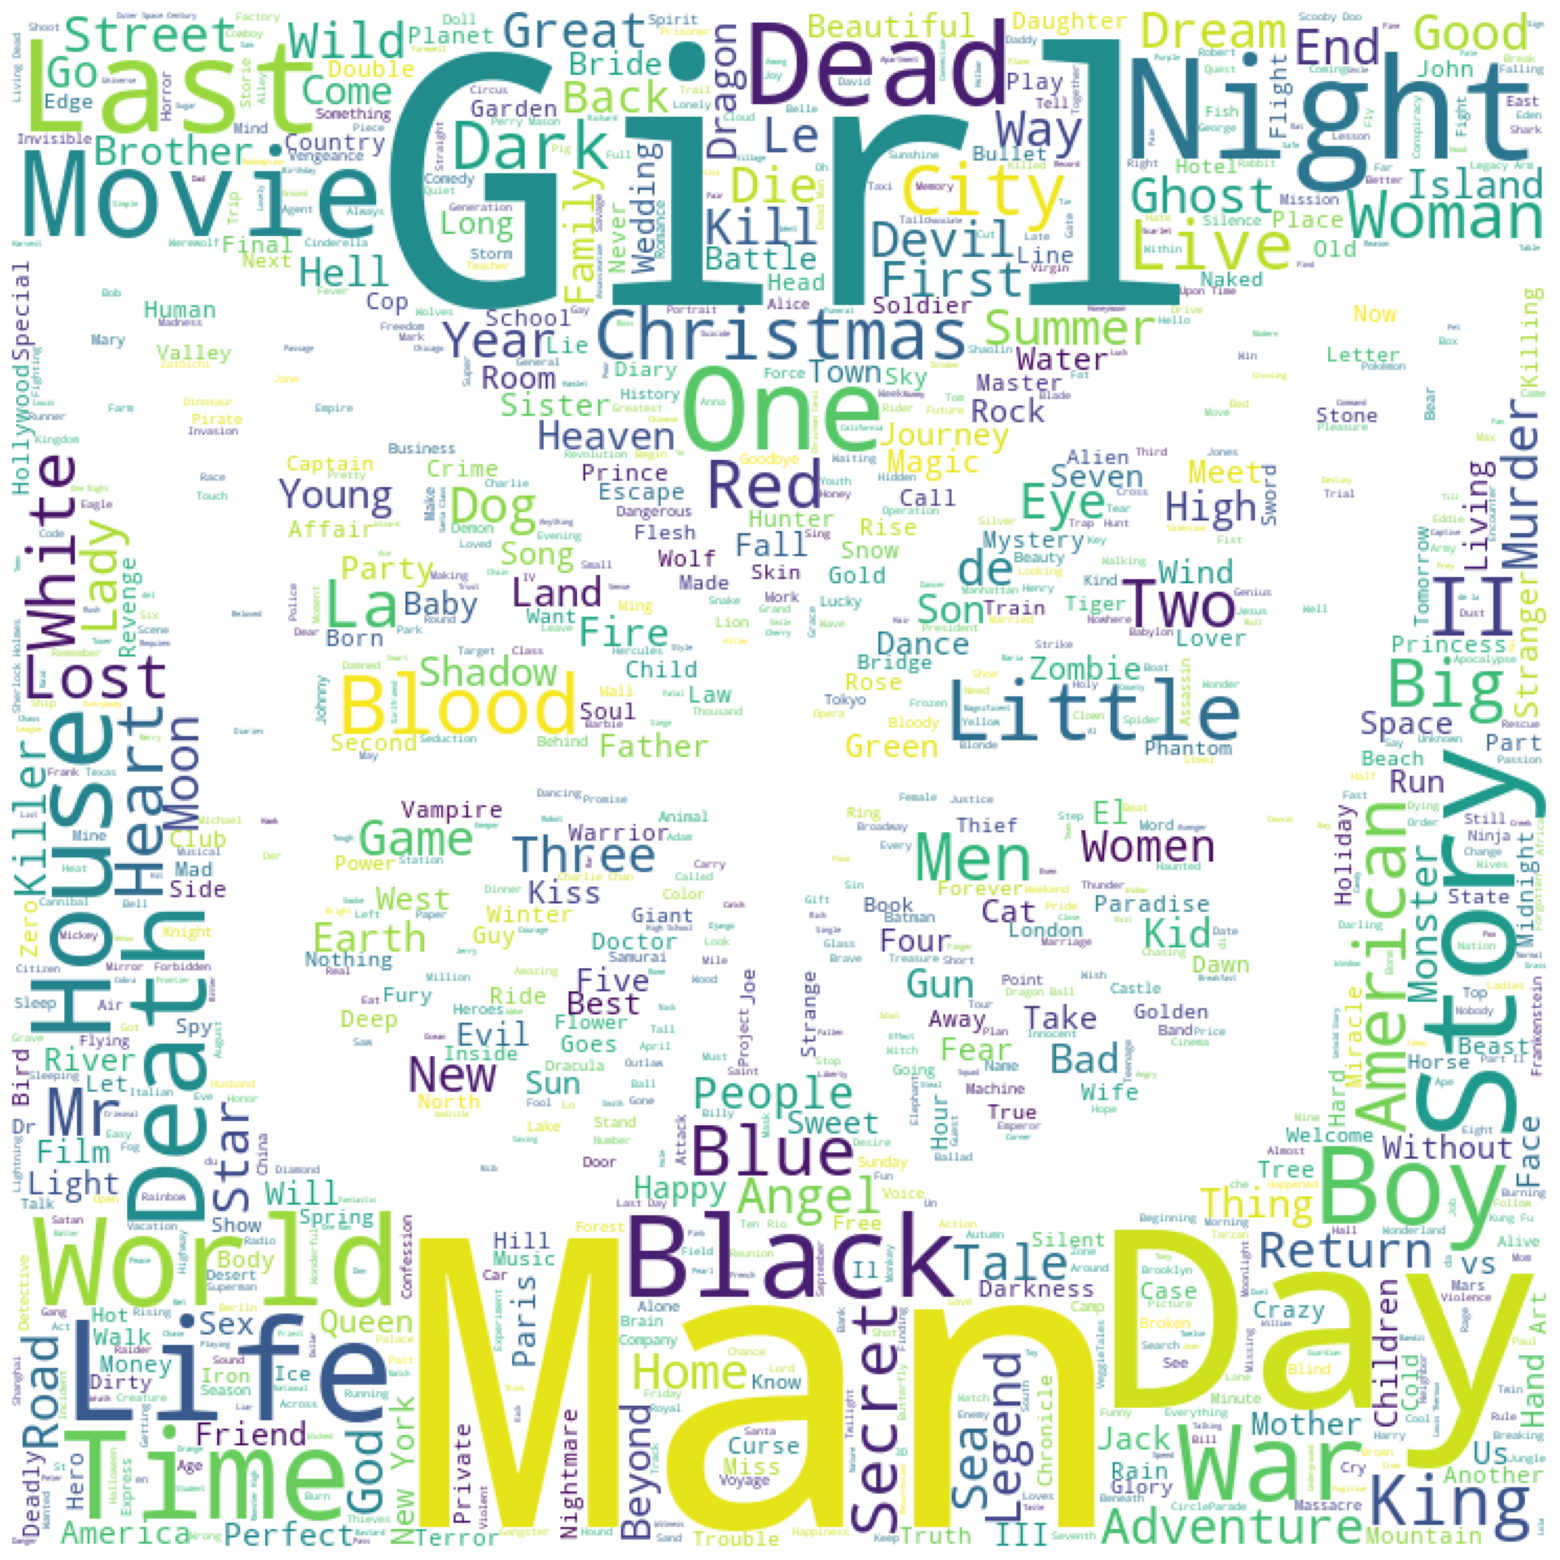

In [5]:
class WordCloudGenerator:
    def __init__(self, data_path, mask_path):
        with open(data_path, 'r') as f:
            self.text = f.read()
            #self.mask = np.array(Image.open(mask_path))
            mask_image = Image.open(mask_path).convert('L')
            self.mask = np.array(ImageOps.invert(mask_image))

    def run(self, output_path, **kwargs):
        wordcloud = WordCloud(
        background_color='white',
        max_words=1000,
        min_word_length=2,
        stopwords=STOPWORDS.union({'love'}),
        mask=self.mask,
        **kwargs
        ).generate(self.text)
            
        plt.figure(figsize=(20, 20))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.savefig(output_path, dpi=1000)
        print(f"Word cloud saved as {output_path}")
            


data_path = '../data/movies.txt'
mask_path = '../data/butterfly.png' 
output_path = '../data/wordcloud_image.png'
if __name__ == '__main__':
    wc_gen = WordCloudGenerator(data_path, mask_path)
    wc_gen.run(output_path, width=600, height=400)


In [3]:
# from collections import Counter
# Counter(text.split()).most_common()